In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (25, 9)

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Loading csv file
df= pd.read_csv('clean_metal.csv')
df.head()

,Date,Price,f000_settle,f001_settle,f002_settle,f003_settle,f004_settle,f005_settle,f006_settle,f007_settle,...,f128_settle,f129_settle,f130_settle,f131_settle,f132_settle,f133_settle,f134_settle,f135_settle,f136_settle,f137_settle
0,2008-12-01,457.032497,56.29,51.91,0.6421,31.40,31.83,1.4924,1.4938,348.75,...,514.4,516.4,12545.0,12560.0,28410.0,27300.0,11655.0,10690.0,9540.0,9650.0
1,2008-12-02,465.530103,55.30,51.78,0.6354,30.77,31.20,1.4895,1.4911,348.25,...,504.8,504.8,12185.0,12215.0,28260.0,27040.0,11190.0,10300.0,9510.0,9630.0
2,2008-12-03,482.060575,55.21,51.21,0.6387,30.58,30.98,1.4734,1.4757,348.25,...,497.7,497.7,11715.0,11830.0,27800.0,26530.0,10605.0,10050.0,9500.0,9590.0
3,2008-12-04,472.395859,57.62,53.94,0.6413,29.50,29.87,1.4746,1.4769,334.00,...,490.1,490.1,11250.0,11240.0,26760.0,25530.0,10055.0,9735.0,9145.0,9225.0
4,2008-12-05,471.922241,56.75,53.58,0.6404,28.55,28.93,1.4696,1.4717,309.25,...,496.3,496.3,10685.0,10590.0,25450.0,24270.0,9965.0,9150.0,8665.0,8715.0


In [3]:
p1=df.copy()
p1.set_index('Date', inplace=True)
p1.head()

,Price,f000_settle,f001_settle,f002_settle,f003_settle,f004_settle,f005_settle,f006_settle,f007_settle,f008_settle,...,f128_settle,f129_settle,f130_settle,f131_settle,f132_settle,f133_settle,f134_settle,f135_settle,f136_settle,f137_settle
Date,,,,,,,,,,,,,,,,,,,,,
2008-12-01,457.032497,56.29,51.91,0.6421,31.40,31.83,1.4924,1.4938,348.75,360.00,...,514.4,516.4,12545.0,12560.0,28410.0,27300.0,11655.0,10690.0,9540.0,9650.0
2008-12-02,465.530103,55.30,51.78,0.6354,30.77,31.20,1.4895,1.4911,348.25,359.50,...,504.8,504.8,12185.0,12215.0,28260.0,27040.0,11190.0,10300.0,9510.0,9630.0
2008-12-03,482.060575,55.21,51.21,0.6387,30.58,30.98,1.4734,1.4757,348.25,359.25,...,497.7,497.7,11715.0,11830.0,27800.0,26530.0,10605.0,10050.0,9500.0,9590.0
2008-12-04,472.395859,57.62,53.94,0.6413,29.50,29.87,1.4746,1.4769,334.00,345.00,...,490.1,490.1,11250.0,11240.0,26760.0,25530.0,10055.0,9735.0,9145.0,9225.0
2008-12-05,471.922241,56.75,53.58,0.6404,28.55,28.93,1.4696,1.4717,309.25,319.25,...,496.3,496.3,10685.0,10590.0,25450.0,24270.0,9965.0,9150.0,8665.0,8715.0


In [4]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split

C:\Users\hp\Anaconda3\envs\data-x\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
X = p1.iloc[:,1:]
Y = p1['Price']

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,Y, test_size=0.3)
ridge = Ridge()
ridge.fit(X_train,y_train)
train_score=ridge.score(X_train,y_train)
test_score=ridge.score(X_test,y_test)
coeff_used = np.sum(ridge.coef_!=0)
print ("training score:", train_score)
print ("test score: ", test_score)
print ("number of features used: ", coeff_used)

ridge.predict

training score: 0.9853172421035038
test score:  0.9838241475877316
number of features used:  138


<bound method LinearModel.predict of Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)>

In [8]:
#a1=pd.DataFrame(lasso.predict(X))
a1 = pd.DataFrame(ridge.predict(X_test))
a1.head()

,0
0,601.279224
1,452.526612
2,288.643469
3,318.052921
4,447.374738


<function matplotlib.pyplot.show(*args, **kw)>

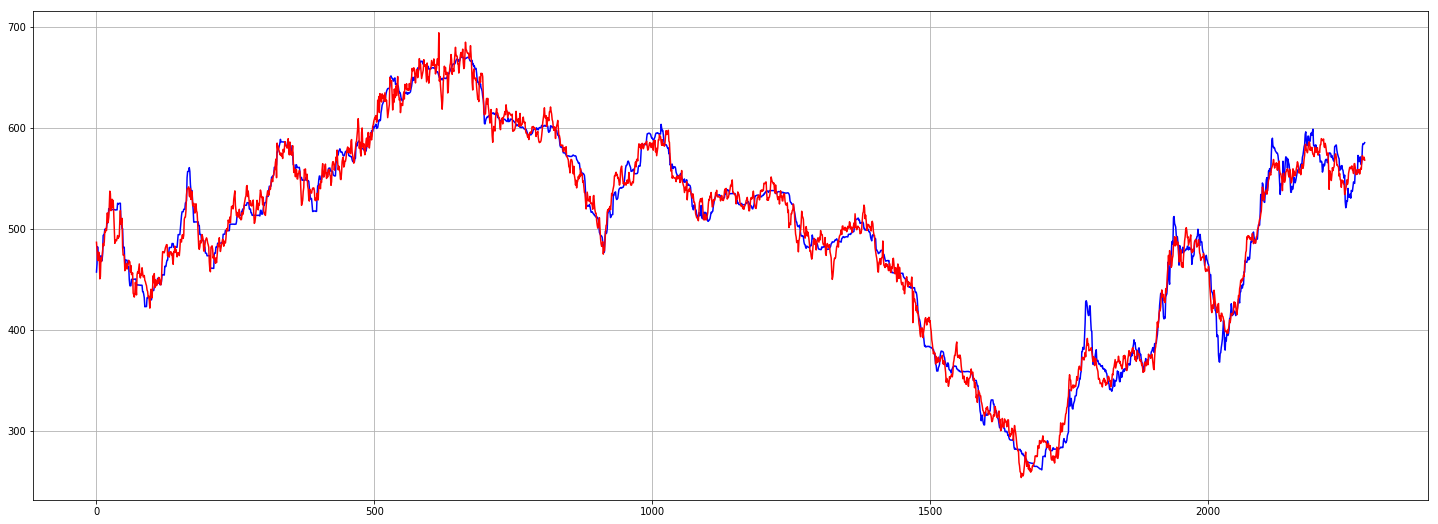

In [9]:
pylab.rcParams['figure.figsize'] = (25, 9)
plot(df.Price, color='blue')
plot(ridge.predict(X), color='red')
plt.grid()
plt.show

In [10]:
a1=df.iloc[:,1:2]

In [11]:
a1['Predict']=pd.DataFrame(ridge.predict(X))

In [12]:
b=a1.iloc[int(2*len(a1)/3):len(a1)]

<function matplotlib.pyplot.show(*args, **kw)>

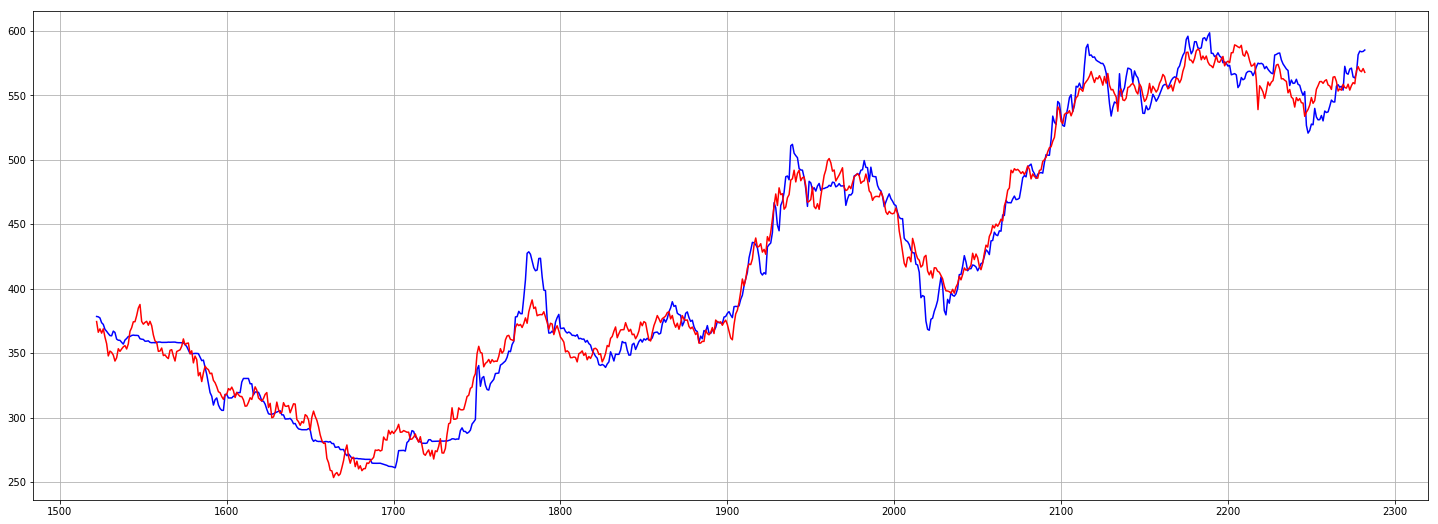

In [13]:
pylab.rcParams['figure.figsize'] = (25, 9)
plot(b.Price, color='blue')
plot(b.Predict, color='red')
plt.grid()
plt.show